## Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Typical Image Size
Let's consider a region of interest in an image w/ a bbox of pixels

In [2]:
# number of pixels in bbox
bbox_size = (100, 100)

## Model Outputs
If we consider the output of the model to be independent conditional Bernoulli random variables, then the sum of the sucesses across the set of non-equal $p_i$ is described by the Poisson binomial distribution.

In [3]:
# these are conditional probabilities described by model

# a random noise model
cond_probs = np.random.uniform(size=np.multiply(*bbox_size))

# a very confident model
cond_probs = np.array(
    [0.01 for _ in range(np.floor(0.75*np.multiply(*bbox_size)).astype(np.int64))] + \
    [0.99 for _ in range(np.ceil(0.25*np.multiply(*bbox_size)).astype(np.int64))]
) 

# a tiered model
cond_probs = np.array(
    [0.01 for _ in range(np.floor(0.25*np.multiply(*bbox_size)).astype(np.int64))] + \
    [0.2 for _ in range(np.floor(0.25*np.multiply(*bbox_size)).astype(np.int64))] + \
    [0.8 for _ in range(np.floor(0.25*np.multiply(*bbox_size)).astype(np.int64))] + \
    [0.99 for _ in range(np.ceil(0.25*np.multiply(*bbox_size)).astype(np.int64))]
) 

# a tiered model
cond_probs = np.array(
    [0.01 for _ in range(np.floor(0.99*np.multiply(*bbox_size)).astype(np.int64))] + \
    [0.60 for _ in range(np.ceil(0.01*np.multiply(*bbox_size)).astype(np.int64))]
) 

In [4]:
beta = 0.1
mu = np.sum(cond_probs)
vars = (cond_probs * (1 - cond_probs)).reshape(bbox_size)
covars = np.arange(vars.shape[0]) * vars  # old methodology

In [5]:
import numpy as np
   
def gkern(size=5, sig=1.):
    """Creates Gaussian square kernel (size,size) w/ a sigma of sig"""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel

In [6]:
conv_filter = gkern(32, 8)


weights = torch.Tensor(np.expand_dims(np.expand_dims(conv_filter, 0), 0))
vars = torch.Tensor(np.expand_dims(np.expand_dims(vars, 0), 0))

In [7]:
# print(mu, np.sqrt(np.sum(cond_probs * (1 - cond_probs))))
sd = np.sqrt(torch.nn.functional.conv2d(vars, weights, padding="same").sum().numpy())

/var/folders/pg/stxydh9d15j6s6v1bjqysn640000gn/T/ipykernel_183/828834084.py:2: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:660.)
  sd = np.sqrt(torch.nn.functional.conv2d(vars, weights, padding="same").sum().numpy())


## Dist'n Approx

/var/folders/pg/stxydh9d15j6s6v1bjqysn640000gn/T/ipykernel_183/1862914191.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


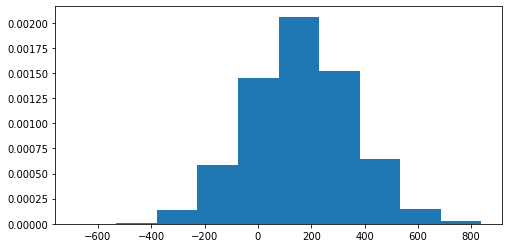

In [8]:
norm_x = np.random.normal(loc=mu, scale=sd, size=10_000)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hist(norm_x, density=True)
fig.show()